In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np



import scipy.stats as stats

### Carga de Dataset

In [194]:
dataset = pd.read_csv('train_tarea.csv')
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Determinando que columnas poseen faltantes (NA o Nulos)

In [195]:
col_con_nan = []

for col in dataset.columns:
    porcentaje_faltante = dataset[col].isnull().mean()
    if(porcentaje_faltante > 0):
        col_con_nan.append(col)
if col_con_nan:
    print("Columnas con valores faltantes:")
    for col in col_con_nan:
        print(col)
else:
    print("No se encontraron columnas con valores faltantes.")

Columnas con valores faltantes:
Age
Cabin
Embarked


### Determinado la proporcion de faltantes. 

In [196]:
dataset[col_con_nan].isnull().mean()

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

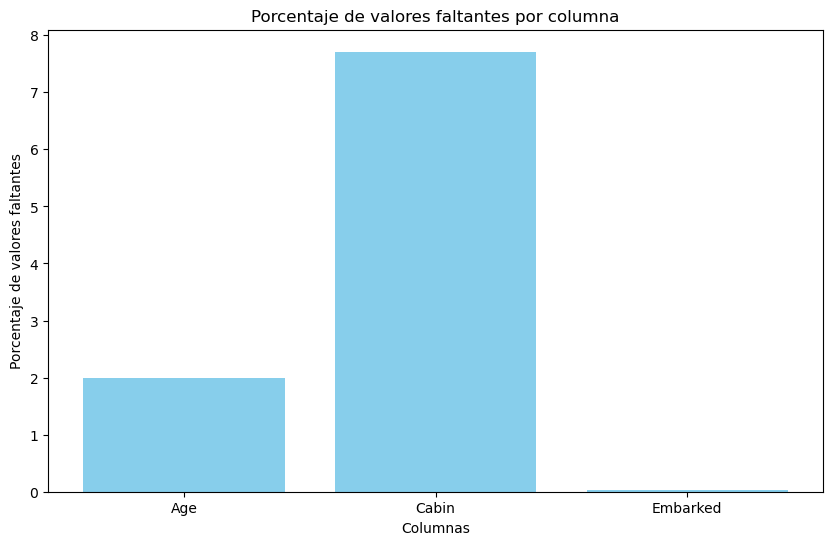

In [197]:
# Crear una lista de nombres de columna y sus porcentajes de valores faltantes
nombres_columnas = []
porcentajes_faltantes = []

for col in col_con_nan:
    if col in dataset.columns:  # Verificar si la columna existe en el DataFrame
        nombres_columnas.append(col)
        porcentaje_faltante = dataset[col].isnull().mean() * 10
        porcentajes_faltantes.append(porcentaje_faltante)

# Crear la gráfica de barras solo si hay columnas con valores faltantes
if nombres_columnas:
    plt.figure(figsize=(10, 6))
    plt.bar(nombres_columnas, porcentajes_faltantes, color='skyblue')
    plt.ylabel('Porcentaje de valores faltantes')
    plt.xlabel('Columnas')
    plt.title('Porcentaje de valores faltantes por columna')

    plt.show()
else:
    print("No hay columnas con valores faltantes.")


### Análisis de variable numérica e Imputación de Datos

In [198]:
cols_for_cca = [col for col in dataset.columns if dataset[col].isnull().mean()<0.05]
cols_for_cca

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [199]:
dataset_cca = dataset[cols_for_cca].dropna()
dataset.shape, dataset_cca.shape

((891, 12), (889, 10))

In [200]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

dataset['Embarked'].hist(bins=50, ax=ax, density=True, color='blue',alpha=0.3)
dataset_cca['Embarked'].hist(bins=50, ax=ax, density=True, color='green',alpha=0.3)
plt.show()

### Imputación

In [201]:
dataset_cca = dataset[cols_for_cca].dropna()
dataset.shape, dataset_cca.shape

((891, 12), (889, 10))

In [202]:
media = dataset['Age'].mean()
mediana = dataset['Age'].median()

print(f'Media: {media} y Mediana: {mediana}')



Media: 29.69911764705882 y Mediana: 28.0


In [203]:
dataset['Age_Mean'] = np.round(dataset['Age'].fillna(media), 0)
dataset['Age_Median'] = np.round(dataset['Age'].fillna(mediana), 0)

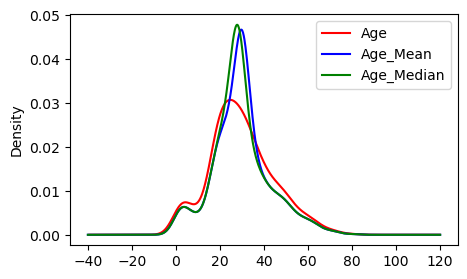

In [204]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

dataset['Age'].plot.density (color='red', legend='Original')
dataset['Age_Mean'].plot.density (color='blue', legend='Imput Media')
dataset['Age_Median'].plot.density (color='green', legend='Imput Mediana')
ax.legend()
plt.show()

In [205]:
print('Varianza Original', dataset['Age'].var())

print('Varianza Media', dataset['Age_Mean'].var())
print('Varianza Median', dataset['Age_Median'].var())

Varianza Original 211.0191247463081
Varianza Media 169.02154125524902
Varianza Median 169.46348882079272


In [206]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_Mean       float64
Age_Median     float64
dtype: object

### Si la variable es categórica, realizar una imputación 


In [207]:
print(dataset.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Mean',
       'Age_Median'],
      dtype='object')


In [208]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [209]:
categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
categoricas

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [210]:
dataCat= dataset[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Survived']]
dataCat.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked   Age  Survived  
0         A/5 21171   NaN        S  22.0         0  
1          PC 17599   C85        C  38.0         1  
2  STON/O2. 3101282   NaN        S  26.0         1  
3            113803  C123        S  35.0         1  
4            373450   NaN        S  35.0         0

In [211]:
dataCat.isnull().mean()

Name        0.000000
Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.002245
Age         0.198653
Survived    0.000000
dtype: float64

In [212]:
dataCat['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [213]:
plt.figure(figsize=(5,3))
dataCat['Sex'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Categoria')
plt.ylabel('Sex')
plt.show()

In [214]:
print(dataCat.columns)


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Survived'], dtype='object')


In [215]:
columnas_numericas = dataCat.select_dtypes(include=['int64', 'float64']).columns
print(columnas_numericas)


Index(['Age', 'Survived'], dtype='object')


In [216]:
print(dataCat.columns)


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Survived'], dtype='object')


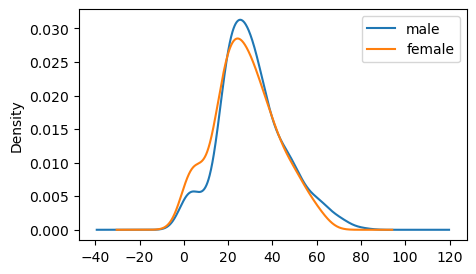

In [217]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

dataCat[dataCat['Sex']== 'male']['Age'].plot(kind='kde', ax=ax, label='male')
dataCat[dataCat['Sex']== 'female']['Age'].plot(kind='kde', ax=ax, label='female')
#dataCat[dataCat['reservation_status']== 'No-Show']['stays_in_week_nights'].plot(kind='kde', ax=ax, label='No-Show')

plt.legend()
plt.show()



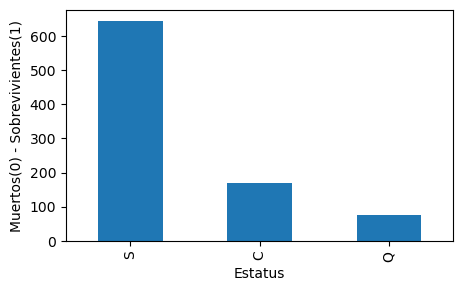

In [218]:
plt.figure(figsize=(5,3))
dataCat['Embarked'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Estatus')
plt.ylabel('Muertos(0) - Sobrevivientes(1)')
plt.show()

In [219]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

dataCat[dataCat['Sex']== 'male']['Age'].plot(kind='kde', ax=ax, label='male')
dataCat[dataCat['Sex']== 'female']['Age'].plot(kind='kde', ax=ax, label='female')




<Axes: ylabel='Density'>

### Codificación de variables categóricas:
a. One Hote Encodign. 
b. Codificación por Frecuencia. 
c. Codificación por Densidad.


In [220]:
dataCV = dataCat[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Survived']]
dataCV.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked   Age  Survived  
0         A/5 21171   NaN        S  22.0         0  
1          PC 17599   C85        C  38.0         1  
2  STON/O2. 3101282   NaN        S  26.0         1  
3            113803  C123        S  35.0         1  
4            373450   NaN        S  35.0         0

In [221]:
dataCV['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [222]:
pd.get_dummies(dataCV)

Age  Survived  Name_Abbing, Mr. Anthony  \
0    22.0         0                     False   
1    38.0         1                     False   
2    26.0         1                     False   
3    35.0         1                     False   
4    35.0         0                     False   
..    ...       ...                       ...   
886  27.0         0                     False   
887  19.0         1                     False   
888   NaN         0                     False   
889  26.0         1                     False   
890  32.0         0                     False   

     Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                               False                                  False   
1                               False                                  False   
2                               False                                  False   
3                               False                                  False   
4                               False                                  False   
..                                ...                                    ...   
886                             False                                  False   
887                             False                                  False   
888                             False                                  False   
889                             False                                  False   
890                             False                                  False   

     Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
0                       False                                       False   
1                       False                                       False   
2                       False                                       False   
3                       False                                       False   
4                       False                                       False   
..                        ...                                         ...   
886                     False                                       False   
887                     False                                       False   
888                     False                                       False   
889                     False                                       False   
890                     False                                       False   

     Name_Adahl, Mr. Mauritz Nils Martin  Name_Adams, Mr. John  \
0                                  False                 False   
1                                  False                 False   
2                                  False                 False   
3                                  False                 False   
4                                  False                 False   
..                                   ...                   ...   
886                                False                 False   
887                                False                 False   
888                                False                 False   
889                                False                 False   
890                                False                 False   

     Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  ...  Cabin_F G73  \
0                                                False    ...        False   
1                                                False    ...        False   
2                                                False    ...        False   
3                                                False    ...        False   
4                                                False    ...        False   
..                                                 ...    ...          ...   
886                                              False    ...        False   
887                                              False    ...        False   
888                                 

In [223]:
pd.get_dummies(dataCV,drop_first=True)

Age  Survived  Name_Abbott, Mr. Rossmore Edward  \
0    22.0         0                             False   
1    38.0         1                             False   
2    26.0         1                             False   
3    35.0         1                             False   
4    35.0         0                             False   
..    ...       ...                               ...   
886  27.0         0                             False   
887  19.0         1                             False   
888   NaN         0                             False   
889  26.0         1                             False   
890  32.0         0                             False   

     Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  \
0                                    False                     False   
1                                    False                     False   
2                                    False                     False   
3                                    False                     False   
4                                    False                     False   
..                                     ...                       ...   
886                                  False                     False   
887                                  False                     False   
888                                  False                     False   
889                                  False                     False   
890                                  False                     False   

     Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
..                                          ...   
886                                       False   
887                                       False   
888                                       False   
889                                       False   
890                                       False   

     Name_Adahl, Mr. Mauritz Nils Martin  Name_Adams, Mr. John  \
0                                  False                 False   
1                                  False                 False   
2                                  False                 False   
3                                  False                 False   
4                                  False                 False   
..                                   ...                   ...   
886                                False                 False   
887                                False                 False   
888                                False                 False   
889                                False                 False   
890                                False                 False   

     Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  \
0                                                False     
1                                                False     
2                                                False     
3                                                False     
4                                                False     
..                                                 ...     
886                                              False     
887                                              False     
888                                              False     
889                                              False     
890                                              False     

     Name_Aks, Mrs. Sam (Leah Rosen)  ...  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0                              False  ...        False        False     False   
1                              False  ...        False        False     False   
2                              False  ...        False        False     False   
3    

In [224]:
dataCV['Age'].value_counts(ascending=False)

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

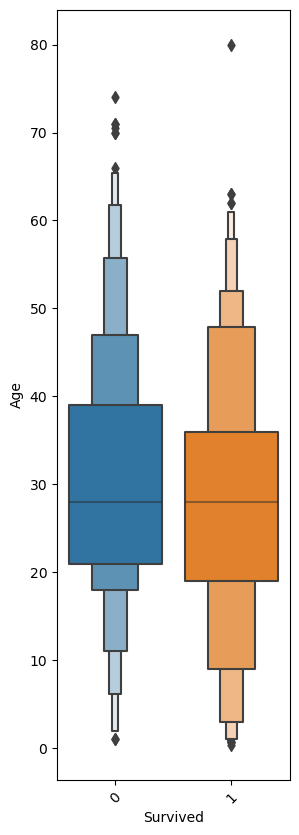

In [225]:
import seaborn as sns

plt.subplots(figsize=(3,10))

room = dataCV['Age']
reser = dataCV['Survived']
sns.boxenplot(x=reser, y=room)
plt.xticks(rotation=45)
plt.show


In [226]:
reserv_freq_dict = dataCV['Age'].value_counts(ascending=False).to_dict()

In [227]:
dataCV.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked   Age  Survived  
0         A/5 21171   NaN        S  22.0         0  
1          PC 17599   C85        C  38.0         1  
2  STON/O2. 3101282   NaN        S  26.0         1  
3            113803  C123        S  35.0         1  
4            373450   NaN        S  35.0         0

In [228]:
dataCV['Age']= dataCV['Age'].map(reserv_freq_dict)

In [229]:
def frequency_encoding_procedure(data_serie):
    freq_dict = data_serie.value_counts(ascending=False).to_dict()
    return data_serie.map(freq_dict)


In [230]:
frequency_encoding_procedure(dataCV['Age'])

0      27.0
1      11.0
2      72.0
3      72.0
4      72.0
       ... 
886    72.0
887    75.0
888     NaN
889    72.0
890    72.0
Name: Age, Length: 891, dtype: float64

In [231]:
for col in dataCV.columns:
    dataCV[col] = frequency_encoding_procedure(dataCV[col])

In [232]:
dataCV

Name  Sex  Ticket  Cabin  Embarked   Age  Survived
0       1  577       1    NaN     644.0  27.0       549
1       1  314       1    1.0     168.0  11.0       342
2       1  314       1    NaN     644.0  72.0       342
3       1  314       2    2.0     644.0  72.0       342
4       1  577       1    NaN     644.0  72.0       549
..    ...  ...     ...    ...       ...   ...       ...
886     1  577       1    NaN     644.0  72.0       549
887     1  314       1    1.0     644.0  75.0       342
888     1  314       2    NaN     644.0   NaN       549
889     1  577       1    1.0     168.0  72.0       342
890     1  577       1    NaN      77.0  72.0       549

[891 rows x 7 columns]

In [235]:
plt.figure(figsize=(6,3))

plt.subplot(131)
dataCat['Age'].hist(bins=50, density=True, color= 'red')
plt.title('Densida - Histograma')

plt.subplot(132)
stats.probplot(dataCat['Age'], dist = 'norm', plot=plt)
plt.title('QQ-Plot')

plt.subplot(133)
sns.boxplot(y = dataCat['Age'])
plt.title('box plot')

plt.show()

### variables son discretas y continuas. 

In [237]:
def get_variables_scale(dataset):
       categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
       continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) > 30]
       discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) <= 30]
       return categoricas, continuas, discretas

cat, cont, disct = get_variables_scale(dataset)

In [238]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [239]:
cont

['PassengerId', 'Age', 'Fare', 'Age_Mean', 'Age_Median']

In [240]:
disct

['Survived', 'Pclass', 'SibSp', 'Parch']

### variables que se consideren continuas aplique el tratamiento de Outliers. métodos 
a. Capping de final de cola. 
b. Capping de valor arbitrario.

In [241]:
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(10,2))

    print(col)
    plt.figure(figsize=(6,3))

    plt.subplot(131)
    dataset[col].hist(bins=50, density=True, color= 'red')
    plt.title('Densidad - Histograma')

    plt.subplot(132)
    stats.probplot(dataset[col], dist = 'norm', plot=plt)
    plt.title('QQ-Plot')

    plt.subplot(133)
    sns.boxplot(y = dataset[col])
    plt.title('box plot')

    plt.show()

PassengerId


<Figure size 1000x200 with 0 Axes>

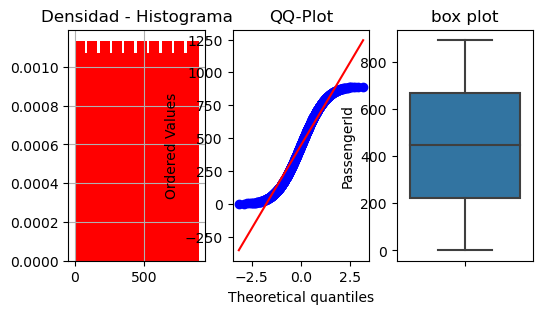

Age


<Figure size 1000x200 with 0 Axes>

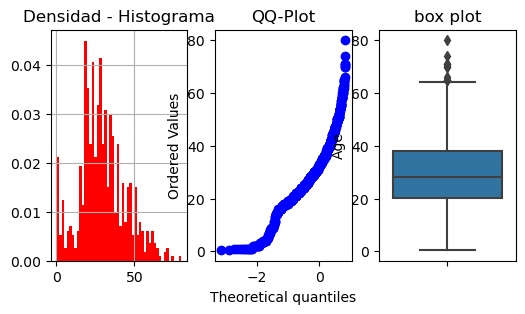

Fare


<Figure size 1000x200 with 0 Axes>

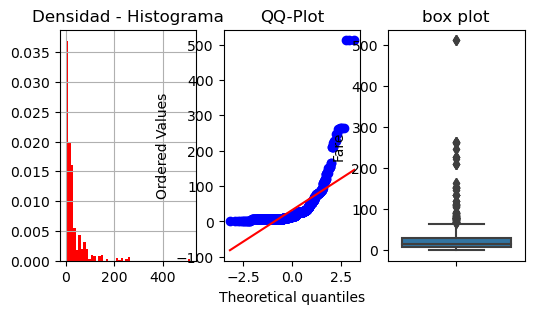

Age_Mean


<Figure size 1000x200 with 0 Axes>

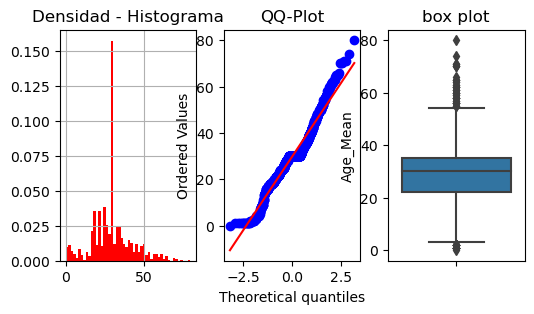

Age_Median


<Figure size 1000x200 with 0 Axes>

In [242]:
for col in cont:
    plot_outliers_analysis(dataset, col)

In [269]:
IQR = dataset['Age_Mean'].quantile(0.75) - dataset['Age_Mean'].quantile(0.25)
LI = dataset['Age_Mean'].quantile(0.25) - (1.50*IQR)
LS = dataset['Age_Mean'].quantile(0.75) + (1.50*IQR)

LI, LS

(2.5, 54.5)

In [270]:
def get_outliers_limits(dataset, col):
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (1.50*IQR)
    LS = dataset[col].quantile(0.75) + (1.50*IQR)

    return LI, LS

In [271]:
dataset['Age_Mean'] = np.where(dataset['Age_Mean']> LS, LS, 
         np.where(dataset['Age']< LI, LI,
         dataset['Age_Mean']))

Age_Mean


<Figure size 1000x200 with 0 Axes>

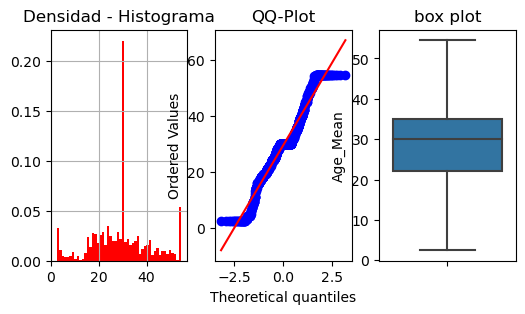

In [272]:
plot_outliers_analysis(dataset, 'Age_Mean')

### Verificar la forma de distribución

In [273]:
continuas = [col for col in dataset.columns if(dataset[col].dtype in ['float64', 'int64'])and (len(dataset[col].unique())>30)]
continuas

['PassengerId', 'Age', 'Fare', 'Age_Mean', 'Age_Median']

In [274]:
discretas = [col for col in dataset  .columns if(dataset[col].dtype in ['float64', 'int64'])and (len(dataset[col].unique())<=30)]
discretas

['Survived', 'Pclass', 'SibSp', 'Parch']

In [275]:
def plot_density_qq(df, variable):
    plt.figure (figsize= (6,3))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    plt.subplot(122)
    stats.probplot(df[variable], dist= 'norm', plot=plt)
    plt.show

In [276]:
plot_density_qq(dataset, 'Age_Mean')

In [277]:
col = 'Age_Mean'

plot_density_qq(dataset, col)

### Normalización de la distribución de probabilidad de cada variable

### Transformación Logaritmica

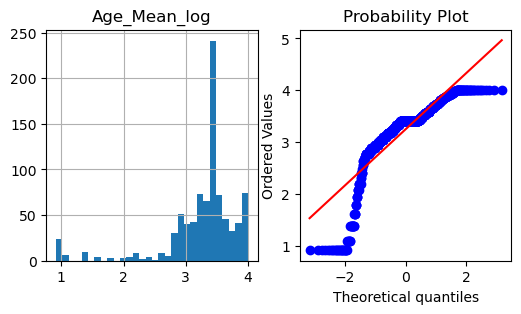

In [283]:
dataset[col + '_log']= np.log(dataset[col])
plot_density_qq(dataset, col +  '_log')

### Transformación Exponencial


In [284]:
dataset[col + '_inv']= 1/(dataset[col])
plot_density_qq(dataset, col +  '_inv')

### Transformación boxcox

In [285]:
dataset[col + '_BC'], lmbd = stats.boxcox(dataset[col])
lmbd = str (round(lmbd,4))
print(lmbd)
plot_density_qq(dataset, col +  '_BC')

0.9387


### Transformación Yeo-johnson

In [287]:
dataset[col + '_YJ'], lmbd = stats.yeojohnson(dataset[col])
lmbd = str (round(lmbd,4))
print(lmbd)
plot_density_qq(dataset, col +  '_YJ')

0.9436


### Transformación Polinomial de orden 2

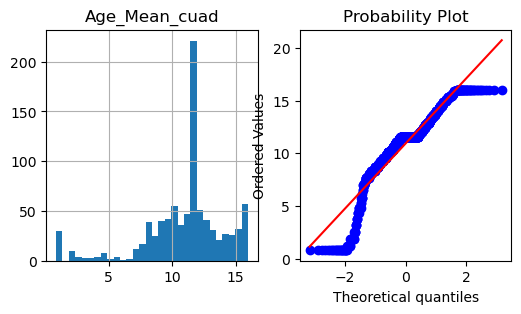

In [288]:
dataset[col + '_cuad']= np.log(dataset[col])**2
plot_density_qq(dataset, col +  '_cuad')

###  Aplicación de tipos de feature scaling. 
a. MinMax Scaling. 
b. Standar Scaling. 
c. MaxAbs Scaling. 
d. Robust Scaling. 

In [294]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataset['Pclass'].plot(kind='kde', ax=ax, label='Pclass')
dataset['Age'].plot(kind='kde', ax=ax, label='Age')
plt.title('Pclass Vrs Survived')
plt.legend()
plt.show()

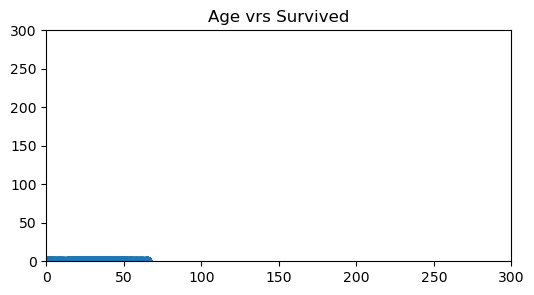

In [300]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=dataset['Age'], y=dataset['Survived'])
plt.title('Age vrs Survived')
plt.xlim((0, 300))
plt.ylim((0, 300))
plt.show()

### Scaling para lead_time

In [301]:
min_if = dataset['Age'].min()
max_if = dataset['Age'].max()
dataset['Age_minMaxscaled'] = (dataset['Age'] - min_if)/(max_if - min_if)

In [305]:
min_if = dataset['Survived'].min()
max_if = dataset['Survived'].max()
dataset['Survived_minMaxscaled'] = (dataset['Survived'] - min_if)/(max_if - min_if)

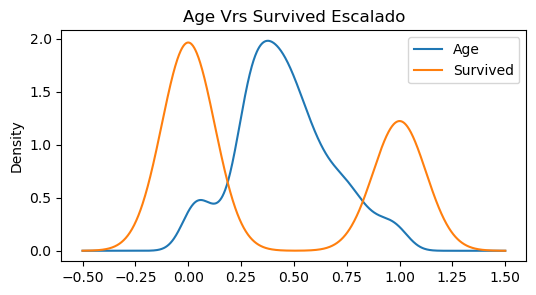

In [307]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataset['Age_minMaxscaled'].plot(kind='kde', ax=ax, label='Age')
dataset['Survived'].plot(kind='kde', ax=ax, label='Survived')
plt.title('Age Vrs Survived Escalado')
plt.legend()
plt.show()